In [30]:
import os
import numpy as np
import pandas as pd

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV


from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

In [27]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

from sklearn.metrics import accuracy_score, f1_score, recall_score

In [230]:
X = pd.read_csv('troudress_train_x.csv')
y = pd.read_csv('troudress_train_y.csv')

In [212]:
y.is_trousers.value_counts()


1    6000
0    6000
Name: is_trousers, dtype: int64

In [213]:
y

,is_trousers
0,0
1,1
2,1
3,0
4,1
...,...
11995,1
11996,0
11997,1
11998,0


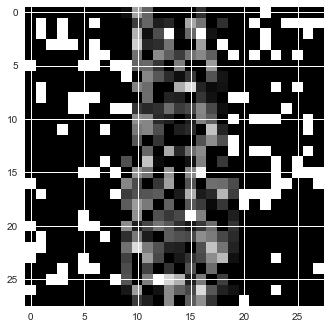

In [215]:
plt.imshow(np.array(X.iloc[0
                        , :]).reshape(28,28), cmap='gray')

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34,test_size=0.20)

In [40]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr.score(X_test, y_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.93625

In [41]:
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, lr_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, lr_pred))

Test Accuracy score:  0.93625
Test F1 score:  0.9374233128834356


In [42]:
fpr1,tpr1,thresh=roc_curve(y_test,lr_pred)
auc1=auc(fpr1,tpr1)

In [57]:
log_loss(y_test, lr_pred)

2.201872648926442

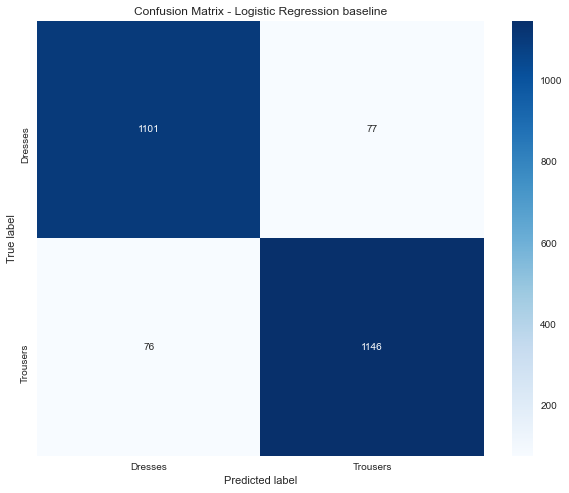

In [43]:
plt.figure(figsize=(10,8))
ConfMatrix = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Dresses', 'Trousers'], 
            yticklabels = ['Dresses', 'Trousers'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression baseline");

## MinMaxScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train)
xtrain_scale = scaler.transform(X_train)
xtest_scale = scaler.transform(X_test)

In [53]:
lr1 = LogisticRegression(max_iter = 10000)
lr1.fit(xtrain_scale, y_train)
lr1_pred = lr1.predict(xtest_scale)
lr1.score(xtest_scale, y_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.94

In [54]:
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, lr1_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, lr1_pred))

Test Accuracy score:  0.94
Test F1 score:  0.9410319410319411


In [55]:
fpr2,tpr2,thresh2=roc_curve(y_test,lr1_pred)
auc2=auc(fpr2,tpr2)

In [58]:
log_loss(y_test, lr1_pred)

2.072350238451951

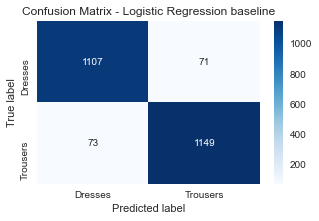

In [247]:
plt.figure(figsize=(5,3))
ConfMatrix = confusion_matrix(y_test,lr1_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Dresses', 'Trousers'], 
            yticklabels = ['Dresses', 'Trousers'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression baseline");

In [62]:
x_test = np.loadtxt('troudress_test_x.csv')
yproba1_test = lr.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

ValueError: could not convert string to float: 'pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,pixel010,pixel011,pixel012,pixel013,pixel014,pixel015,pixel016,pixel017,pixel018,pixel019,pixel020,pixel021,pixel022,pixel023,pixel024,pixel025,pixel026,pixel027,pixel028,pixel029,pixel030,pixel031,pixel032,pixel033,pixel034,pixel035,pixel036,pixel037,pixel038,pixel039,pixel040,pixel041,pixel042,pixel043,pixel044,pixel045,pixel046,pixel047,pixel048,pixel049,pixel050,pixel051,pixel052,pixel053,pixel054,pixel055,pixel056,pixel057,pixel058,pixel059,pixel060,pixel061,pixel062,pixel063,pixel064,pixel065,pixel066,pixel067,pixel068,pixel069,pixel070,pixel071,pixel072,pixel073,pixel074,pixel075,pixel076,pixel077,pixel078,pixel079,pixel080,pixel081,pixel082,pixel083,pixel084,pixel085,pixel086,pixel087,pixel088,pixel089,pixel090,pixel091,pixel092,pixel093,pixel094,pixel095,pixel096,pixel097,pixel098,pixel099,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel469,pixel470,pixel471,pixel472,pixel473,pixel474,pixel475,pixel476,pixel477,pixel478,pixel479,pixel480,pixel481,pixel482,pixel483,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel500,pixel501,pixel502,pixel503,pixel504,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,pixel512,pixel513,pixel514,pixel515,pixel516,pixel517,pixel518,pixel519,pixel520,pixel521,pixel522,pixel523,pixel524,pixel525,pixel526,pixel527,pixel528,pixel529,pixel530,pixel531,pixel532,pixel533,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783'

In [63]:
x_test = pd.read_csv('troudress_test_x.csv')

In [64]:
x_test

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,1.0000,0.0092,0.0000,1.0000,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0000,...,0.2298,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,1.0000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.0000,...,0.4275,0.4000,0.1198,0.0000,0.0174,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0053,0.0000,...,0.6392,0.2478,1.0000,1.0000,0.0058,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0169,0.0000,...,0.5565,0.0000,0.0000,0.0000,0.0000,0.0,1.0,0.0,0.0,1.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0000,0.0081,...,0.4745,0.4783,0.0000,0.2727,0.0000,1.0,1.0,0.0,1.0,0.0
1997,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.5524,0.0000,0.0000,1.0000,0.0000,1.0,1.0,0.0,0.0,0.0
1998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,...,0.3347,1.0000,1.0000,1.0000,0.0000,1.0,1.0,0.0,1.0,0.0


In [71]:
xtest_scale = scaler.transform(x_test)
yproba1_test = lr1.predict_proba(xtest_scale)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

lr1 got .9715 acc, .0709 (.9291) on error rate and # 76 without xtest scale, but with it scaled it got .9719 acc and 0.1 (0.90) error rate with #78

## adding how many white and black pixels

In [126]:
X = pd.read_csv('troudress_train_x.csv')
y = pd.read_csv('troudress_train_y.csv')

In [127]:
cols = list(X.columns)

In [133]:
def whites(x):
    whites=0
    for i in cols:
        if x[i]==1:
            whites+=1
    return whites

def blacks(x):
    blacks=0
    for i in cols:
        if x[i]==0:
            blacks+=1
    return blacks

In [240]:
X['white_pix'] = X.apply(lambda x: whites(x), axis=1)
X['black_pix'] = X.apply(lambda x: blacks(x), axis=1)

In [135]:
X

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,white_pix,black_pix
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0522,...,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105,474
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.0000,...,1.0000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,119,487
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0000,1.0000,...,0.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,107,462
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.0080,...,0.0078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,74,399
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0000,1.0000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119,479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.1176,...,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112,459
11996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0129,0.1928,...,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,102,469
11997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,123,500
11998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,96,473


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34,test_size=0.20)

In [235]:
lr2 = LogisticRegression(max_iter = 10000)
lr2.fit(X_train, y_train)
lr2_pred = lr2.predict(X_test)
lr2.score(X_test, y_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.94125

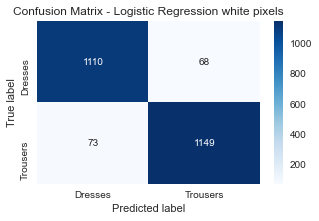

In [239]:
plt.figure(figsize=(5,3))
ConfMatrix = confusion_matrix(y_test,lr2_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Dresses', 'Trousers'], 
            yticklabels = ['Dresses', 'Trousers'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression white pixels");

In [114]:
x_test = pd.read_csv('troudress_test_x.csv')

In [125]:
x_test

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,white_pix
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,1.0000,0.0092,0.0000,1.0000,0.0,1.0,1.0,0.0,0.0,91
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0,109
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0,0.0,0.0,0.0,0.0,115
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.0000,...,0.4000,0.1198,0.0000,0.0174,0.0,0.0,0.0,0.0,0.0,111
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0053,0.0000,...,0.2478,1.0000,1.0000,0.0058,0.0,0.0,0.0,1.0,0.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0169,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0,1.0,0.0,0.0,1.0,109
1996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0000,0.0081,...,0.4783,0.0000,0.2727,0.0000,1.0,1.0,0.0,1.0,0.0,82
1997,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,1.0,1.0,0.0,0.0,0.0,102
1998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,...,1.0000,1.0000,1.0000,0.0000,1.0,1.0,0.0,1.0,0.0,145


In [104]:
# xtest_scale = scaler.transform(x_test)
yproba1_test = lr2.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

    lr2 got error rate of 0.0715 and AUROC of 0.9716, rank #77
    1-0.0715 = 0.9285 accuracy, this is with the white pixels counted

In [242]:
lr3 = LogisticRegression(max_iter = 10000)
lr3.fit(X_train, y_train)
lr3_pred = lr3.predict(X_test)
lr3.score(X_test, y_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9429166666666666

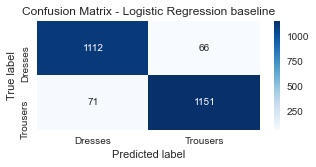

In [245]:
plt.figure(figsize=(5,2))
ConfMatrix = confusion_matrix(y_test,lr3_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Dresses', 'Trousers'], 
            yticklabels = ['Dresses', 'Trousers'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression baseline");

In [138]:
x_test = pd.read_csv('troudress_test_x.csv')

In [139]:
x_test['white_pix'] = x_test.apply(lambda x: whites(x), axis=1)
x_test['black_pix'] = x_test.apply(lambda x: blacks(x), axis=1)

In [140]:
# xtest_scale = scaler.transform(x_test)
yproba1_test = lr3.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

lr3 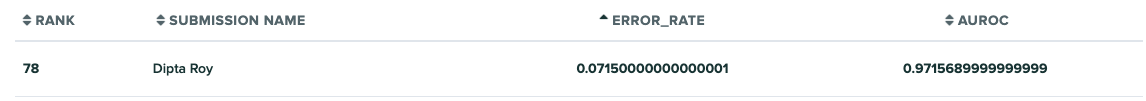

## Change all white pixels to black to try to get rid of noise

In [248]:
X = pd.read_csv('troudress_train_x.csv')
y = pd.read_csv('troudress_train_y.csv')

In [249]:
cols = list(X.columns)

In [250]:
def rid_noise(x):
    for i in cols:
        if x[i]==1:
            x[i]=0
    return x

In [251]:
X.apply(lambda x: rid_noise(x), axis=1)

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0522,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0040,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0080,...,0.3255,0.0,0.0078,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.1176,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0129,0.1928,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.2143,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34,test_size=0.20)

In [253]:
lr4 = LogisticRegression(max_iter = 10000)
lr4.fit(X_train, y_train)
lr4_pred = lr4.predict(X_test)
lr4.score(X_test, y_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9620833333333333

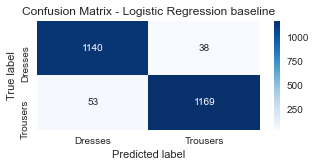

In [254]:
plt.figure(figsize=(5,2))
ConfMatrix = confusion_matrix(y_test,lr4_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Dresses', 'Trousers'], 
            yticklabels = ['Dresses', 'Trousers'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression baseline");

In [155]:
x_test = pd.read_csv('troudress_test_x.csv')

In [156]:
x_test.apply(lambda x: rid_noise(x), axis=1)

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0000,0.0092,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.2298,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.4275,0.4000,0.1198,0.0000,0.0174,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0053,0.0000,...,0.6392,0.2478,0.0000,0.0000,0.0058,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0169,0.0000,...,0.5565,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0081,...,0.4745,0.4783,0.0000,0.2727,0.0000,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.5524,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.3347,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0


In [157]:
yproba1_test = lr4.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

lr4 = getting rid of white noise 
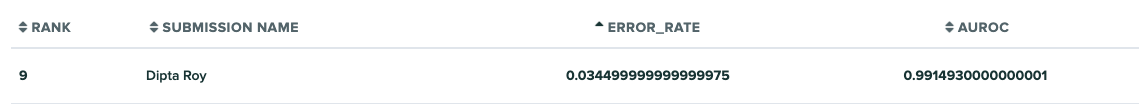

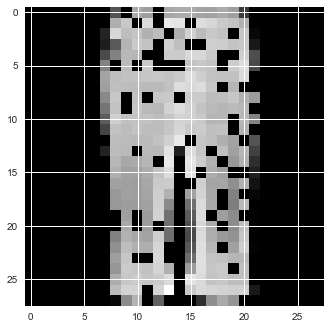

In [159]:
plt.imshow(np.array(X_train.iloc[15, :]).reshape(28,28), cmap='gray')

In [162]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [165]:
lr5 = LogisticRegression(max_iter = 10000)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(lr5, distributions)
search = clf.fit(X_train, y_train)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/uti

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [166]:
search.best_params_

{'C': 0.22187341134125882, 'penalty': 'l2'}

In [167]:
lr6 = LogisticRegression(max_iter = 10000, C=0.22187341134125882)
lr6.fit(X_train, y_train)
lr_pred = lr6.predict(X_test)
lr6.score(X_test, y_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666666666666667

In [168]:
yproba1_test = lr6.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

lr6 = white noise deleted and C=0.22187341134125882
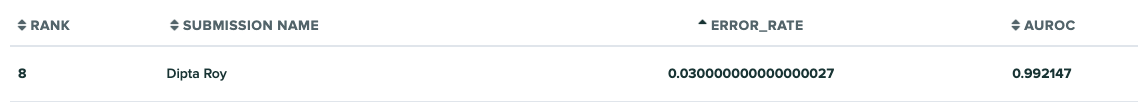

In [170]:
lr5 = LogisticRegression(max_iter=10000)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf2 = RandomizedSearchCV(lr5, distributions, cv=5)
search2 = clf2.fit(X, y)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [173]:
search2.best_params_

{'C': 1.1409180664346752, 'penalty': 'l2'}

In [174]:
lr7 = LogisticRegression(max_iter = 10000, C=1.1409180664346752)
lr7.fit(X, y)
# lr_pred = lr7.predict(X_test)
# lr7.score(X_test, y_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.1409180664346752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [175]:
yproba1_test = lr7.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

lr7= no white noise and full data on random cv
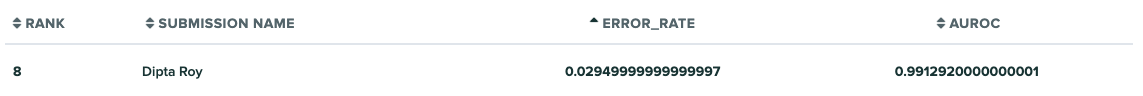

In [185]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [202]:
lr5 = LogisticRegression()
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'], max_iter =list(range(650,750)))
clf2 = RandomizedSearchCV(lr5, distributions, cv=7)
search2 = clf2.fit(X, y)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/uti

In [203]:
search2.best_params_

{'C': 0.19481005865264, 'max_iter': 745, 'penalty': 'l2'}

In [207]:
lr8 = LogisticRegression(max_iter = 674, C=0.09601596723343642)
lr8.fit(X, y)
yproba1_test = lr8.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lr8 = randomcv on C's, max iter and penalty
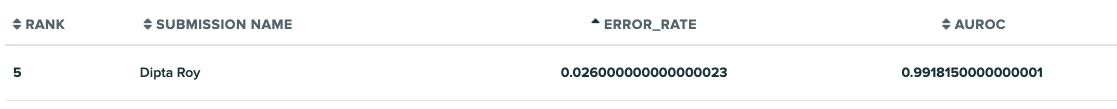

In [206]:
lr9 = LogisticRegression(max_iter = 745, C=0.07)
lr9.fit(X, y)
yproba1_test = lr9.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

/Users/dipta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [216]:
X = pd.read_csv('troudress_train_x.csv')
y = pd.read_csv('troudress_train_y.csv')

In [217]:
X.apply(lambda x: rid_noise(x), axis=1)

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0522,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0040,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0080,...,0.3255,0.0,0.0078,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.1176,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0129,0.1928,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.2143,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
from scipy.ndimage.interpolation import shift
from scipy.ndimage.interpolation import rotate

In [225]:
# Method to shift the image by given dimension
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X]
y_train_augmented = [image for image in y]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(X, y):
            X_train_augmented.append(shift_image(image, dx, dy))
            y_train_augmented.append(label)


AttributeError: 'str' object has no attribute 'reshape'

In [226]:
z= zip(X,y)

In [228]:
z[0]

TypeError: 'zip' object is not subscriptable

In [255]:
from sklearn.model_selection import GridSearchCV

In [261]:
lr10 = LogisticRegression()
distributions = dict(C=np.logspace(-9, 6, 31), max_iter =[670, 675,680])
clf2 = GridSearchCV(lr10, distributions, cv=2, n_jobs=-1)
search2 = clf2.fit(X, y)

KeyboardInterrupt: 